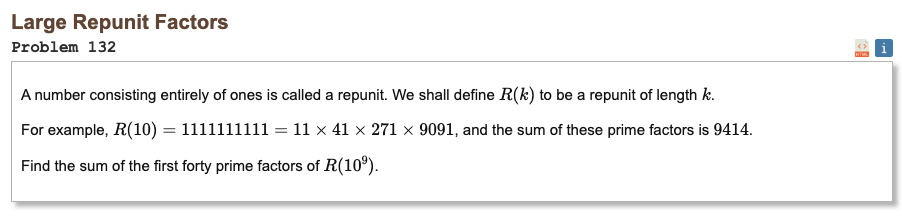

## Initial approach

* make a sieve function to generate primes up to a limit
* target: find first 40 prime factors of repunit r(10^9)
* property: p divides r(n) ⇔ 10^n ≡ 1 mod p
* skip primes 2 and 5
* check primes in increasing order using pow(10, 10^9, p)
* collect first 40 primes that satisfy condition
* sum them and print result

```python
def sieve(limit):
    s = bytearray(b"\x01")*(limit+1)
    s[0:2] = b"\x00\x00"
    p = 2
    while p*p <= limit:
        if s[p]:
            s[p*p:limit+1:p] = b"\x00"*(((limit - p*p)//p) + 1)
        p += 1
    return [i for i in range(2, limit+1) if s[i]]

target_count = 40
found = []
seen = set()
limit = 2_000_000
prev_limit = 1
n = 10**9
while len(found) < target_count:
    primes = sieve(limit)
    for p in primes:
        if p <= prev_limit:
            continue
        if p == 2 or p == 5:
            continue
        if pow(10, n, p) == 1:
            if p not in seen:
                found.append(p)
                seen.add(p)
                if len(found) == target_count:
                    break
    prev_limit = limit
    limit *= 2

print(sum(found))
```

needs an optimization. it takes too long to run.